<a href="https://colab.research.google.com/github/RaquelMichelon/Data-Imersion-4-Houses-Search-SP-Brazil/blob/main/DataImmersion_HouseSearch_SaoPaulo_Brazil.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Immersion 04 | Imersão Dados Alura (Maio/22)

---


## Warm Up

In [ ]:
import pandas as pd

path = "https://gist.githubusercontent.com/tgcsantos/3bdb29eba6ce391e90df2b72205ba891/raw/22fa920e80c9fa209a9fccc8b52d74cc95d1599b/dados_imoveis.csv"

df = pd.read_csv(path)

df.head()

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor
0,"Avenida Itacira, 255",Planalto Paulista,São Paulo,1000,4,8,6,R$ 7.000.000
1,"Rua Aurelia Perez Alvarez, 42",Jardim dos Estados,São Paulo,496,4,4,4,R$ 3.700.000
2,Rua Alba Valdez,Jardim Reimberg,São Paulo,125,4,3,2,R$ 380.000
3,NaN,Jardim Morumbi,São Paulo,310,3,2,4,R$ 685.000
4,"Rua Tobias Barreto, 195",Mooca,São Paulo,100,3,2,2,R$ 540.000


In [ ]:
#bring the series "Metragem" = one column of the dataframe
df["Metragem"].mean()

442.30065947242207

## Warm Up - Working with string

In [ ]:
word1 = 'hello'
word2 = 'Raquel'

sentence = '%s %s' % (word2, word1)
sentence

'Raquel hello'

In [ ]:
text = "Lorem Ipsum is simply dummy text of the printing and typesetting industry. Lorem Ipsum has been the industry's standard dummy text ever since the 1500s, when an unknown printer took a galley of type and scrambled it to make a type specimen book. It has survived not only five centuries, but also the leap into electronic typesetting, remaining essentially unchanged. It was popularised in the 1960s with the release of Letraset sheets containing Lorem Ipsum passages, and more recently with desktop publishing software like Aldus PageMaker including versions of Lorem Ipsum."

In [ ]:
long_words = []
for word in text.split():
  if len(word) > 5:
    long_words.append(word)
print(long_words)

['simply', 'printing', 'typesetting', 'industry.', "industry's", 'standard', '1500s,', 'unknown', 'printer', 'galley', 'scrambled', 'specimen', 'survived', 'centuries,', 'electronic', 'typesetting,', 'remaining', 'essentially', 'unchanged.', 'popularised', 'release', 'Letraset', 'sheets', 'containing', 'passages,', 'recently', 'desktop', 'publishing', 'software', 'PageMaker', 'including', 'versions', 'Ipsum.']


In [ ]:
#List Comprehension
long_words = []
long_words = [word for word in text.split() if len(word) > 7]
print(long_words)

['printing', 'typesetting', 'industry.', "industry's", 'standard', 'scrambled', 'specimen', 'survived', 'centuries,', 'electronic', 'typesetting,', 'remaining', 'essentially', 'unchanged.', 'popularised', 'Letraset', 'containing', 'passages,', 'recently', 'publishing', 'software', 'PageMaker', 'including', 'versions']


### Task
1. Create a function preprocess_text() that gets a string as an input
2. It returns a frequency dictionary, whose keys refer to all unique words and values refer to the number of times the words appear
3. Don't forget to lowercase the words
4. Replace each numeric value with the word 'number'
Example:

input: "I like 123 I print 2.13"

output: {'i' : 2, 'like' : 1, 'number' : 2, 'print' : 1}

In [ ]:
#One way: using separeted functions

def helper(text):
  text = text.split()
  result = []

  for word in text:
    if word.isdigit():
      result.append('number')
    else:
      result.append(word.lower())
  return result


def count_words(text_list):
  new_dict = {}
  for word in text_list:
    if word in new_dict.keys():
      new_dict[word] += 1
    else:
      new_dict[word] = 1
  return new_dict


def preprocess_text(text):
  text = helper(text)
  new_dict = count_words(text)
  return new_dict



In [ ]:
preprocess_text('I like 123 I print 213')

{'i': 2, 'like': 1, 'number': 2, 'print': 1}

In [ ]:
#Other way: same function using list comprehension

def preprocess_text(text):
    words = [word.lower() if not word.isdigit() else 'number' for word in text.split()]
    
    vocab = {}
    for word in words:
        if word in vocab.keys():
            vocab[word] += 1
        else:
            vocab[word] = 1 
            
    return vocab

In [ ]:
preprocess_text('I like 123 I print 213')

{'i': 2, 'like': 1, 'number': 2, 'print': 1}

# Predict Property Value

![](https://www.mashvisor.com/blog/wp-content/uploads/2019/07/10-Factors-That-Affect-Property-Value-7-Will-Surprise-You.jpg)

## Lesson 1 - May 23rd, 2022

---


[Original DataSet](https://www.kaggle.com/datasets/kaggleshashankk/house-price-data-of-sao-paulo)

[DataSet to this project](https://gist.githubusercontent.com/tgcsantos/3bdb29eba6ce391e90df2b72205ba891/raw/22fa920e80c9fa209a9fccc8b52d74cc95d1599b/dados_imoveis.csv)

In [ ]:
 #Let's obtain the DataSet

import pandas as pd
url = 'https://gist.githubusercontent.com/tgcsantos/3bdb29eba6ce391e90df2b72205ba891/raw/22fa920e80c9fa209a9fccc8b52d74cc95d1599b/dados_imoveis.csv'
df = pd.read_csv(url)

In [ ]:
#Show data

df.head()

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor
0,"Avenida Itacira, 255",Planalto Paulista,São Paulo,1000,4,8,6,R$ 7.000.000
1,"Rua Aurelia Perez Alvarez, 42",Jardim dos Estados,São Paulo,496,4,4,4,R$ 3.700.000
2,Rua Alba Valdez,Jardim Reimberg,São Paulo,125,4,3,2,R$ 380.000
3,NaN,Jardim Morumbi,São Paulo,310,3,2,4,R$ 685.000
4,"Rua Tobias Barreto, 195",Mooca,São Paulo,100,3,2,2,R$ 540.000


In [ ]:
#Plot more data

df

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor
0,"Avenida Itacira, 255",Planalto Paulista,São Paulo,1000,4,8,6,R$ 7.000.000
1,"Rua Aurelia Perez Alvarez, 42",Jardim dos Estados,São Paulo,496,4,4,4,R$ 3.700.000
2,Rua Alba Valdez,Jardim Reimberg,São Paulo,125,4,3,2,R$ 380.000
3,NaN,Jardim Morumbi,São Paulo,310,3,2,4,R$ 685.000
4,"Rua Tobias Barreto, 195",Mooca,São Paulo,100,3,2,2,R$ 540.000
...,...,...,...,...,...,...,...,...
10003,Rua Tapuçu,Vila Sofia,São Paulo,95,2,2,2,R$ 665.000
10004,Rua Guararema,Bosque da Saúde,São Paulo,605,8,7,5,R$ 2.300.000
10005,Rua Estero Belaco,Vila da Saúde,São Paulo,205,3,3,6,R$ 1.050.000
10006,"Rua Manuel Onha, , 514",Vila Oratório,São Paulo,185,3,2,2,R$ 2.200\n /Mês


In [ ]:
#Plot one sample line

df.sample()

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor
4683,NaN,Santo Amaro,São Paulo,140,3,3,2,R$ 1.100.000


In [ ]:
#Plot 10 sample lines

df.sample(10)

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor
298,Rua Deolinda de Oliveira,Vila Moraes,São Paulo,150,3,2,2,R$ 435.000
9048,Rua Professor Corrêa Brito,Jardim da Pedreira,São Paulo,268,3,3,6,R$ 700.000
5458,NaN,Santo Amaro,São Paulo,445,4,4,6,R$ 1.980.000
7240,Rua Tito Prates da Fonseca,Vila Moinho Velho,São Paulo,138,4,4,2,R$ 595.000
4039,NaN,Boaçava,São Paulo,412,4,7,6,R$ 6.000.000
1743,Alameda Lorena,Jardim Paulista,São Paulo,115,2,2,1,R$ 1.860.000
3943,Rua Curupaiti,Bela Aliança,São Paulo,353,4,6,3,R$ 2.900.000
6860,Rua Alexandre Dumas,Chácara Santo Antônio (Zona Sul),São Paulo,205,2,4,3,R$ 1.100.000
3091,Rua Bandeirante Sampaio Soares,Vila Morumbi,São Paulo,703,4,8,6,R$ 30.000\n /Mês
5100,Rua Açaré,Alto de Pinheiros,São Paulo,212,3,3,3,R$ 2.240.000


**Exploring the DataFrame**

In [ ]:
type(df)

pandas.core.frame.DataFrame

In [ ]:
#Get only one specific column 

df["Bairro"]

0         Planalto Paulista
1        Jardim dos Estados
2           Jardim Reimberg
3            Jardim Morumbi
4                     Mooca
                ...        
10003            Vila Sofia
10004       Bosque da Saúde
10005         Vila da Saúde
10006         Vila Oratório
10007           Vila Alpina
Name: Bairro, Length: 10008, dtype: object

In [ ]:
#Get one row in one column - Slice

df["Bairro"][6522]

'Vila Paulo Silas'

**I wanna calculate the mean of Data Series Price (Valor)**

Let's check if that is possible:

In [ ]:
#Show some details of all DataFrame

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10008 entries, 0 to 10007
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Rua        6574 non-null   object
 1   Bairro     9996 non-null   object
 2   Cidade     10008 non-null  object
 3   Metragem   10008 non-null  int64 
 4   Quartos    10008 non-null  int64 
 5   Banheiros  10008 non-null  int64 
 6   Vagas      10008 non-null  int64 
 7   Valor      10008 non-null  object
dtypes: int64(4), object(4)
memory usage: 625.6+ KB


Once the Data Serie "Valor" is an object, we can't calculate the mean directly.

So, first, we need to clean it.

Before that, let's find out the mean of the Data Serie "Metragem", which is of the "int" type.

In [ ]:
df.Metragem.mean()

442.30065947242207

Now, I wanna know what is the mean of "Metragem" of the houses only from the "bairro" called "Vila Mariana"

In [ ]:
#Show if there are houses in "Vila Mariana"

sum(df["Bairro"] == "Vila Mariana")

184

In [ ]:
#The DataFrame has 184 houses in Vila Mariana; Now, lets calculate the mean.

#To do that, let's select just specific lines of df

it_has_houses = (df["Bairro"] == "Vila Mariana")

houses_vila_mariana = df[it_has_houses]
houses_vila_mariana

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor
100,Rua Pero Correia,Vila Mariana,São Paulo,250,3,3,1,R$ 1.350.000
120,Praça Doutor Carvalho Franco,Vila Mariana,São Paulo,250,3,5,2,R$ 2.450.000
155,Rua Professor João Marinho,Vila Mariana,São Paulo,170,3,4,2,R$ 1.490.000
160,NaN,Vila Mariana,São Paulo,228,4,5,3,R$ 2.200.000
334,"Rua Pero Correia, 892",Vila Mariana,São Paulo,350,6,4,10,R$ 1.700.000
...,...,...,...,...,...,...,...,...
9645,Rua Sousa Ramos,Vila Mariana,São Paulo,285,3,5,5,R$ 1.650.000
9701,Rua Benito Juarez,Vila Mariana,São Paulo,171,3,2,4,R$ 1.650.000
9737,Rua Benito Juarez,Vila Mariana,São Paulo,171,3,2,4,R$ 1.650.000
9807,NaN,Vila Mariana,São Paulo,275,3,1,6,R$ 1.500.000


In [ ]:
#Now the mean:

houses_vila_mariana["Metragem"].mean()

233.6195652173913

The mean of footage of the houses in Vila Mariana is less than the mean of footage of all DataFrame. **But just the mean is insuficient analysis to conclude it. It is important analyse even more the Data.**

Now let's check how much houses are in which "Bairro":

In [ ]:
#Plot a Data Series with "Bairro" as index

df["Bairro"].value_counts()

Alto de Pinheiros     409
Jardim Guedala        403
Jardim Paulista       309
Brooklin Paulista     247
Jardim Europa         240
                     ... 
Jardim das Imbuias      1
Vila Represa            1
Vila Nancy              1
Sítio Represa           1
Vila Invernada          1
Name: Bairro, Length: 701, dtype: int64

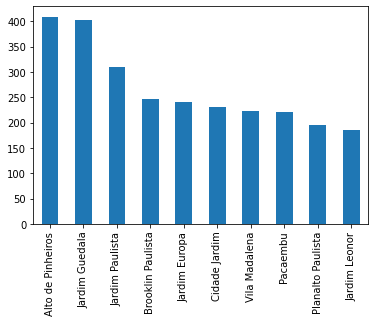

In [ ]:
#Plot this data in a Graph showing the first 10 "Bairro" with greater number of houses

n_houses_bairro = df["Bairro"].value_counts()
n_houses_bairro.head(10).plot.bar()

### CHALLENGES | Lesson 1 - May 23rd, 2022

---
[Pandas Documentation](https://pandas.pydata.org/)
---

1 - Realizar a média da metragem para cada um dos bairros. (Proposto pelo Paulo)

2 - Duas formas de selecionar os dados por bairro (consultar os métodos na documentação do Pandas). (Proposto pelo Thiago)

3 - Explorar alguns gráficos na documentação e aplicar nas demais colunas do DF, assim como tentar colocar alguma conclusão. (Proposto pelo Thiago)

4 - Pegar outras estatísticas dos dados (como média, mediana, mim, max). (Proposto pela Vivian)

5 - Descobrir quais são os bairros que não tem nome de rua. (Proposto pela Vivian)

---


In [87]:
# Challenge #1
# source: https://www.kaggle.com/code/giatro/agrupando-e-manipulando-dados-com-pandas/notebook

df_group__by_bairro = df.groupby('Bairro')


In [88]:
mean_met_por_bairro = df_group__by_bairro["Metragem"].mean().sort_values(ascending = False)
mean_met_por_bairro

Bairro
Sítio Represa                         37000.000000
Vila Castelo                           2850.000000
Jardim Guedala                         2486.640199
Jardim das Camélias                    1700.000000
Chácara Flora                          1260.727273
                                          ...     
Cidade Antônio Estevão de Carvalho       57.500000
Jardim Nova Germania                     57.000000
Jardim Benfica                           48.000000
Vila Leonor                              46.000000
Vila Guaca                               10.000000
Name: Metragem, Length: 701, dtype: float64

In [68]:
# Challenge #2 
# source: https://pandas.pydata.org/docs/getting_started/intro_tutorials/03_subset_data.html

df.head()


,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor
0,"Avenida Itacira, 255",Planalto Paulista,São Paulo,1000,4,8,6,R$ 7.000.000
1,"Rua Aurelia Perez Alvarez, 42",Jardim dos Estados,São Paulo,496,4,4,4,R$ 3.700.000
2,Rua Alba Valdez,Jardim Reimberg,São Paulo,125,4,3,2,R$ 380.000
3,NaN,Jardim Morumbi,São Paulo,310,3,2,4,R$ 685.000
4,"Rua Tobias Barreto, 195",Mooca,São Paulo,100,3,2,2,R$ 540.000


In [69]:
#First way

df.iloc[0:, 1]

0         Planalto Paulista
1        Jardim dos Estados
2           Jardim Reimberg
3            Jardim Morumbi
4                     Mooca
                ...        
10003            Vila Sofia
10004       Bosque da Saúde
10005         Vila da Saúde
10006         Vila Oratório
10007           Vila Alpina
Name: Bairro, Length: 10008, dtype: object

In [70]:
#Second way

df.loc[:, ["Bairro"]]

,Bairro
0,Planalto Paulista
1,Jardim dos Estados
2,Jardim Reimberg
3,Jardim Morumbi
4,Mooca
...,...
10003,Vila Sofia
10004,Bosque da Saúde
10005,Vila da Saúde
10006,Vila Oratório


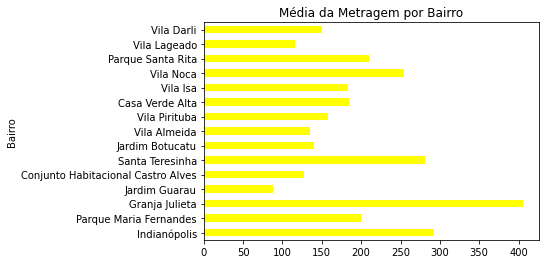

In [72]:
# Challenge #3

#Gráfico de barras horizontais

mean_met_por_bairro.sample(15).plot.barh(title="Média da Metragem por Bairro", color="yellow")

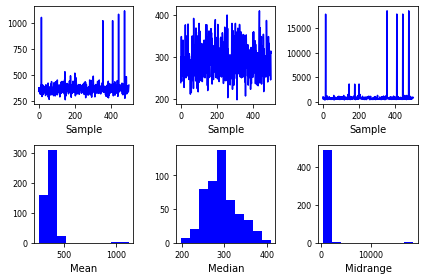

In [76]:
#Bootstrap Plot

from pandas.plotting import bootstrap_plot

bootstrap_plot(df["Metragem"], size=50, samples=500, color="blue");



Bootstraping is a tool to quantify uncertainty and Bootstrap plot quickly plot for summarize statistic values as Mean and Median.

[Source](https://support.minitab.com/pt-br/minitab/20/help-and-how-to/probability-distributions-random-data-and-resampling-analyses/how-to/bootstrapping-for-1-sample-function/interpret-the-results/key-results/)

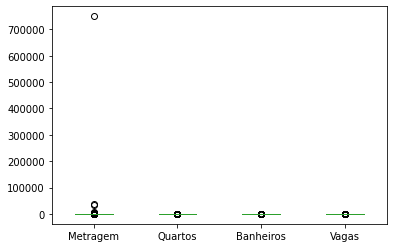

In [77]:
df.plot.box()

Looking for this boxplot, we can see at least one outlier on the column "Metragem", which we will need to verify.

In [78]:
# Challenge #4

df.describe()

,Metragem,Quartos,Banheiros,Vagas
count,10008.000000,10008.000000,10008.000000,10008.000000
mean,442.300659,3.483114,3.879097,4.097222
std,7515.379389,1.064200,1.988467,2.824014
min,10.000000,1.000000,1.000000,1.000000
25%,173.000000,3.000000,2.000000,2.000000
50%,290.000000,3.000000,4.000000,4.000000
75%,460.250000,4.000000,5.000000,5.000000
max,750000.000000,16.000000,40.000000,50.000000


In [86]:
# Challenge #5

df['Rua'].isnull().sum()

3434

In [91]:
df.Rua.isnull().sum()

3434

In [93]:
## get count of missing values of a particular column by group
# source: https://www.datasciencemadesimple.com/check-count-missing-values-pandas-python-2/
 
df.groupby(['Bairro'])['Rua'].apply(lambda x: x.isnull().sum()).sample(20)


Bairro
Jardim Felicidade (Zona Oeste)     0
Jardim Cidalia                     2
Vila Água Funda                    0
Vila Brasilina                    11
Vila Morumbi                      19
Pari                               0
Pirituba                           0
Super Quadra Morumbi               3
Sacomã                             2
Campo Belo                        32
Jardim Santo Elias                 1
Vila Dom Pedro I                  12
Santa Cecília                      4
Higienópolis                       4
Cambuci                           12
Consolação                         9
Vila Piauí                         0
Parque Santa Madalena              0
Vila Rio Branco                    0
Vila Jaguara                       0
Name: Rua, dtype: int64